# Part I - FordGOBike Visualization
## by Nyaga Derrick



## Introduction

In the San Francisco Bay Area of California, there is a regional public bicycle sharing program called Bay Wheels (FordGoBike). The Bay Wheels system, which launched as Bay Area Bike Share in August 2013 and currently has more than 2,600 bicycles in 262 stations throughout San Francisco, the East Bay, and San Jose. In collaboration with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District, Motivate manages the system. The first regional and extensive bicycle sharing program to be implemented on the West Coast of the United States is called Bay Wheels.

Bay Wheels is a public bicycle system, or bike-share program, that makes bicycles available to anyone for short-term shared use, either for a fee or free. Many bike share programs enable users to pick up a bike at one "dock" and return it to another dock that is a part of the same program. Docks are specialized bike stands that lock the bicycle and can only be opened by a computer. The computer unlocks a bike once the user provides payment information. When the user returns the bike, it is locked in place by the dock. There are dockless systems. Numerous systems use smartphone mapping applications to display nearby bicycles and open docks.

We will Warangle and explore BayWheel's trip data which is available for public use Bay wheel's trip data is anonymized for security purposes 
     
       
       

## Preliminary Wrangling


In [43]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Gathering


In [44]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [45]:
# orginzed way of viewing data shape and composition
print(df.shape,"\n")
print(df.dtypes,"\n")
display(df.head(5))

(183412, 16) 

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object 



,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [46]:
# Checking for sum of duplicated values
df.duplicated().sum()

0

In [47]:
# checking % of missing values
missing_sum = (df.isnull().sum()/df.isnull().count()) *100

display(missing_sum)

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

### What is the structure of your dataset?

> The data set as 183412 rides with  16 features that are the columns.They include. 
- duration_sec               
- start_time                 
- end_time                  
- start_station_id          
- start_station_name       
- start_station_latitude     
- start_station_longitude   
- end_station_id            
- end_station_name           
- end_station_latitude       
- end_station_longitude      
- bike_id                    
- user_type                  
- member_birth_year          
- member_gender              
- bike_share_for_all_trip    


Most Variables are numeric in nature while others like start_time and end_time have wrong data types instead of datatime 

Also,some variables had missing values with the following %:

- member_birth_year          4.506248
- member_gender              4.506248
- start_station_id           0.107408
- start_station_name         0.107408
- end_station_id             0.107408
- end_station_name           0.107408



### What is/are the main feature(s) of interest in your dataset?

> My interest is to know:
1. How long does the average trip take ?
2. The time of day, day of the week that most trips are taken 
3. if the above depend on a user being a subscriber or customer

The main features that are i will use are- duration_sec, member_gender, user_type, member_birth_year, start time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Extracting the time of the day and the day of the week from the start time will, in my opinion, serve to address the first aim described above with the aid of additional feature engineering from the major features of interest. Additionally, it may be anticipated that the user type would be able to assist with the third objective before the duration sec with the second. Additionally, elements like member gender and member birth year would be very helpful in assisting my research.

In [48]:
# make a copy of the original dataset
df_new = df.copy()

In [49]:
#lets drop irrelevant columns(variables) to my analysis
df_new.drop(['start_station_id','start_station_latitude' ,'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude', 'bike_id', 
        'bike_share_for_all_trip'] , axis=1, inplace =True)
df_new.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male


In [50]:
#fix the data types issue in start time
df_new['start_time'] = pd.to_datetime(df_new['start_time'])
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

In [51]:
#extract the day of the week 
df_new['day_of_week'] = pd.DatetimeIndex(df_new['start_time']).strftime('%A')
#extract the time of the day
df_new['start_hour'] = df_new['start_time'].apply(lambda time: time.hour)
df_new['time_of_day'] = 'Morning'
df_new['time_of_day'][(df_new['start_hour'] >= 12) & (df_new['start_hour'] <= 17)]='Afternoon'
df_new['time_of_day'][(df_new['start_hour'] >= 18) & (df_new['start_hour'] <= 23)]='Night'

#show the columns
display(df_new[['day_of_week','start_hour','time_of_day']].head())

,day_of_week,start_hour,time_of_day
0,Thursday,17,Afternoon
1,Thursday,18,Night
2,Thursday,12,Afternoon
3,Thursday,17,Afternoon
4,Thursday,23,Night


In [52]:
# Lets View the new dataframe 
display(df_new.head())

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,day_of_week,start_hour,time_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,Thursday,17,Afternoon
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,Thursday,18,Night
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,Thursday,12,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,Thursday,17,Afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Thursday,23,Night


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variable 


lets start with looking at the distribution of the main variables of interest: duration_sec , time_of_day , user_type and day_of_week

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: day_of_week, dtype: int64

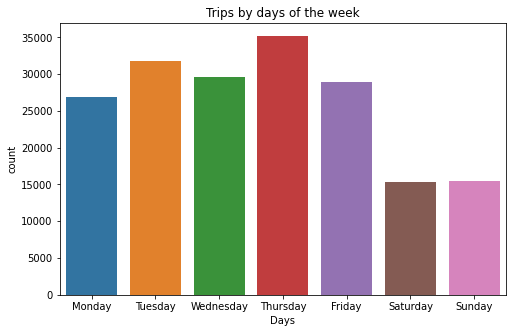

In [53]:
# lets count of trips made in  day of the week 
display(df_new['day_of_week'].value_counts().sort_values(ascending=False))
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# lets plot the distribution
plt.figure(figsize=[8, 5])

sb.countplot(data = df_new ,x ='day_of_week' ,order= weekday)
plt.title('Trips by days of the week')
plt.xlabel('Days')
plt.show()


It so happens that Thursday, Tuesday, and Wednesday are the days of the week with the most trips. The least number of travels are on Saturday and Sunday, which is understandable given that those days are off from work. As a result, I would be looking into how gender and user type are dispersed throughout the week.

Percentage count trips made in terms of day(%)
Afternoon    38.51
Morning      38.42
Night        23.07
Name: time_of_day, dtype: float64


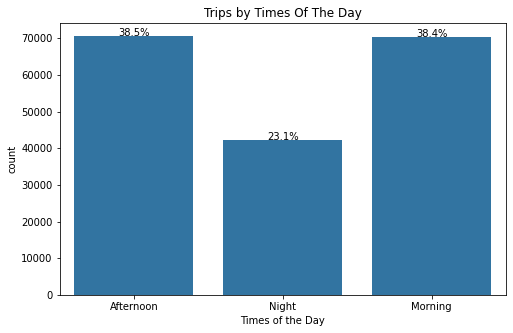

In [54]:
# lets get the % count of trips in terms of times per day

time_of_day_count =(df_new['time_of_day'].value_counts()/df_new['time_of_day'].count())*100
print("Percentage count trips made in terms of day(%)")
print(time_of_day_count.round(2).sort_values(ascending = False))

#lets plot the distribution
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data = df_new , x ='time_of_day', color =base_color)
points = df_new.shape[0]
members_count = df_new['time_of_day'].value_counts()
locs,lables = plt.xticks()

#lets plot the Bar chart
for loc, label in zip(locs,lables):
    count= members_count[label.get_text()]
    string = '{:0.1f}%'.format(100*count/points)
    plt.text(loc, count-8,string, ha = 'center')
    
plt.title("Trips by Times Of The Day")
plt.xlabel('Times of the Day')
plt.show()

The plot reveals that the hour of the day with the most trips are in the afternoon (12:00–17:59), followed by the morning (00:00 - 11:59 hours of the day). The number of travels made in the two periods did not differ significantly, though. This makes a lot of sense. Nobody anticipates there to be so many rides at night. Further investigation will be conducted to determine whether this is likely influenced by user types (subscriber and customer),These is what we will plot next

User Types percentage count(%)


Subscriber    89.17
Customer      10.83
Name: user_type, dtype: float64


Member Gender Percentage count (%)


Male      74.60
Female    23.32
Other      2.09
Name: member_gender, dtype: float64

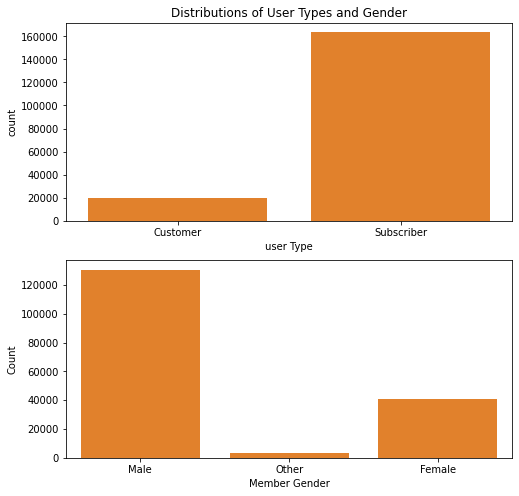

In [76]:
# Lets get the % count of user types and gender
user_type_count = (df_new['user_type'].value_counts()/df_new['user_type'].count())*100
member_gender_count = (df_new['member_gender'].value_counts()/df_new['member_gender'].count())*100

print("User Types percentage count(%)")
display(user_type_count.round(2).sort_values(ascending= False))
print("\nMember Gender Percentage count (%)")
display(member_gender_count.round(2).sort_values(ascending=False))

# The distribution of user type and gender
fig, ax = plt.subplots(nrows=2, figsize= [8,8])
color_d= sb.color_palette()[1]
sb.countplot(data = df_new, x = 'user_type', color = color_d, ax = ax[0])
sb.countplot(data = df_new, x ='member_gender', color = color_d,  ax = ax[1])
ax[0].set_xlabel('user Type')
ax[0].set_ylabel('count')
ax[1].set_xlabel('Member Gender')
ax[1].set_ylabel('Count')
ax[0].set_title('Distributions of User Types and Gender');

The majority of journeys (about 90%) are taken by subscribers, as would be expected in most circumstances, with the remaining 10% being made up of merely casual riders. Who wouldn't want to use their membership effectively if subscribers made a higher percentage of trips? Another possibility is that subscribers use the bikes for their everyday commutes while customers just use them for recreational activities.
Additionally, men make up about 75% of travelers who have taken trips, roughly three times as many as women, with the remaining 2% being classified as other.

Now lets check out duration_sec Variable

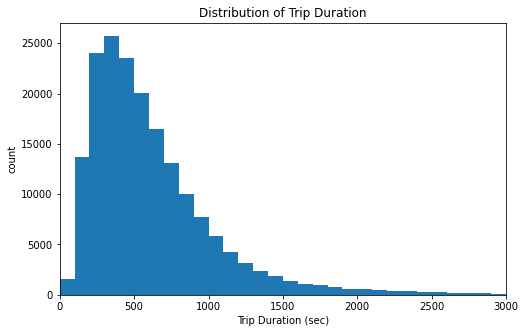

In [56]:
#lets have a standard-scaled plot
size_b = 100
bins = np.arange(0, df_new['duration_sec'].max()+size_b,size_b)

plt.figure(figsize=[8, 5])
plt.hist(data = df_new, x = 'duration_sec',bins=bins)
plt.xlim(0,3000)
plt.xlabel('Trip Duration (sec)')
plt.ylabel('count')
plt.title('Distribution of Trip Duration')
plt.show()

As per the plot above its highly skewed and its difficult to view hence i had size bin of 100 and set the x axis limit to 3000. i will convert the trip duration to minute instead of seconds and get to know the average of a trip

In [57]:
#converting the trip duration variable into minutes
df_new['duration_min'] = df_new['duration_sec'] / 60

#lets drop the duration column since we replacing it with duration_min
df_new.drop('duration_sec', axis = 1, inplace = True)

#lets display the new column
display(df_new[['duration_min']].head())

,duration_min
0,869.750000
1,708.683333
2,1030.900000
3,608.166667
4,26.416667


The time duration of average trip taken is 12.1 minutes.


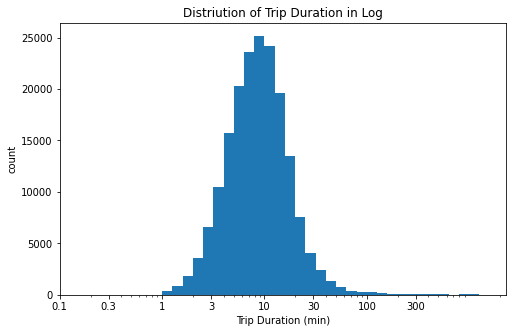

In [58]:
# print the average trip duration
average_trip_duration = np.round(df_new['duration_min'].mean(),2)
print("The time duration of average trip taken is %s minutes."%(average_trip_duration))

# trip duration distribution in log scale
binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df_new['duration_min'].max())+binsize, binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = df_new, x = 'duration_min',bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.ylabel('count')
plt.title('Distriution of Trip Duration in Log')
plt.show()

After plotting using log scale and having duration in mins we see that the duration picks at around 10 mins and the average trip duration in is 12mins

Now lets look at other columns we see if we can explore them 

percentage count of Starting hours
17    11.92
8     11.48
18     9.17
9      8.67
16     7.73
7      5.79
19     5.39
15     5.00
12     4.76
13     4.66
10     4.56
14     4.44
11     4.30
20     3.53
21     2.49
6      1.90
22     1.59
23     0.90
0      0.50
5      0.49
1      0.30
2      0.21
4      0.13
3      0.09
Name: start_hour, dtype: float64


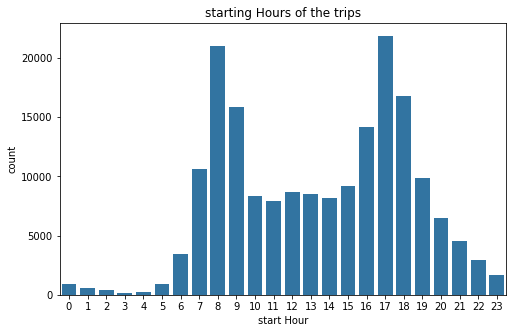

In [59]:
#lets observe start hour 
hour_count= (df_new['start_hour'].value_counts()/df_new['start_hour'].count())*100
print('percentage count of Starting hours')
print(hour_count.round(2).sort_values(ascending=False))

# lets  plot the distribution(day of week)
plt.figure(figsize=[8, 5])
color_b = sb.color_palette()[0]
sb.countplot( data = df_new, x ='start_hour', color = color_b)
plt.title('starting Hours of the trips')
plt.xlabel('start Hour')
plt.show()

As per the bar plot we see that between 8am and 9am and 5pm and 6pm is when we have the highest count meaning that thats when most trips are made assumption is morining hours people are heading to work and evening hours is when they are leaving work.

Now lets get to know the distribution of ages between various age groups

In [60]:
#lets create a new column member age
df_new['member_age'] = df_new['member_birth_year'].apply(lambda x: 2022-x)
#let drop the member birth column 
df_new.drop('member_birth_year', axis = 1 , inplace= True )

display(df_new[['member_age']].head())

,member_age
0,38.0
1,NaN
2,50.0
3,33.0
4,48.0


In [61]:
def age_group(x):
    if x >= 18 and x <= 28:
          return 'Youth'
    if x >= 29 and x <= 64:
        return 'Adults'
    if x >= 65:
          return 'Eldery'
    else:
        return x


In [62]:
#lets apply the above function 
df_new['age_group'] = df_new.member_age.apply(lambda x: age_group(x))

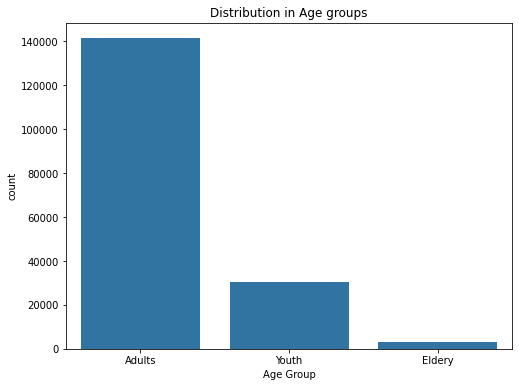

In [63]:
#lets plot the distribution
plt.figure(figsize=[8, 6])
color_b = sb.color_palette()[0]
sb.countplot( data = df_new, x ='age_group', color = color_b)
plt.title('Distribution in Age groups')
plt.xlabel('Age Group')
plt.show()

As per the plot we see that the Adults are the most users of the fordgobike across all age groups and the elderly carry out the least usage 

Now lets break down member into age group in terms of various age number

In [64]:
max_age = str(df_new.member_age.max())
df_new['member_age_ratio'] = df_new['member_age'].apply(lambda x :
                                                '10 - 20' if 10<x<=20 else 
                                                  '21 - 30' if 20<x<=30 else
                                                  '31 - 40' if 30<x<=40 else 
                                                  '41 - 50' if 40<x<=50 else
                                                  '51 - 60' if 50<x<=60 else
                                                  '61 - 70' if 60<x<=70 else
                                                  '71 - 80' if 70<x<=80 else
                                                  '81 - '+max_age if 80<x<=float(max_age) else x)

df_new[['member_age']]= df_new[['member_age']].astype('float')
display(df_new[['member_age_ratio']].head())


,member_age_ratio
0,31 - 40
1,NaN
2,41 - 50
3,31 - 40
4,41 - 50


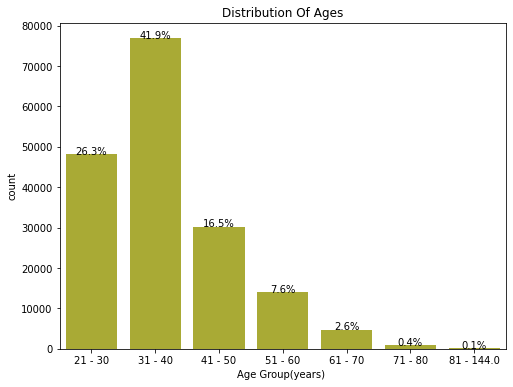

In [65]:

#lets plot the distribution
plt.figure(figsize=[8,6])
base_color = sb.color_palette()[8]
sb.countplot(data = df_new.sort_values(['member_age_ratio']) , x ='member_age_ratio', color =base_color)
points = df_new.shape[0]
members_count = df_new['member_age_ratio'].value_counts()
locs,lables = plt.xticks()

#lets plot the Bar chart
for loc, label in zip(locs,lables):
    count= members_count[label.get_text()]
    string = '{:0.1f}%'.format(100*count/points)
    plt.text(loc, count-8,string, ha = 'center')
    
plt.title ('Distribution Of Ages')
plt.xlabel('Age Group(years) ')
plt.ylabel('count')
plt.show()

As per the plot above we see that most people between the age of 31-40 use the fordgobike more as compared to other age ratios, while age 21-30 is the second highest.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable member age, which are obtained by deducting the member birth year from the year the data was recorded—2022 i used it  to create an age group column inclusive of youth, alduts and eldery we observed that the adults are the most users of fordgobike. I had to convert the duration from seconds to minutes in order to treat the duration sec. I then applied a log transform, which resulted in a distribution that was slightly unimodal with a peak around 10 mins and a mean of around 12 mins.
> The are summary of findings i made 
- Thursday, Tuesday, and Wednesday are the days of the week with the most trips. Compared to weekends, weekdays from Monday through Friday are when most individuals take rides.
- Afternoon is the time of day were most trips take place followed by moring hours
- Most users in terms of gender are the Males
- Most people that use fordgobikes are subscribed to it 
- Most trips are done between 8-9am and 5(17)-6pm(18)
- Most users of in terms of age group are the Adults who are between 29- 64
- most users between the age ratio of 31-40 are the most users of ford go bike while the age ratio between 21-30 is the second highest



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Data for Ages seemed a bit off but since its what we given in the dataset i left it that because they still valid. some varibles i performed chnage of data types in order to have them more clear eg start_time convertered it to date and time from objects. i aslo added columns to the dataset that were relevant to my analysis through combination of variables that bore to columns such as day_of_week , time_of_day, age_groups, duration_min,member_age_ratio and member_age. i also dropped some columns that were not needed in my exploration 

## Bivariate Exploration



lets observe the correlation we have between pairs of features in our data set 

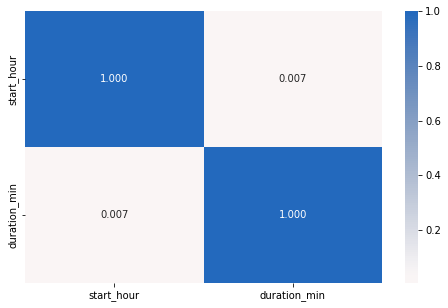

In [66]:
#lets create variables and store the features
num_fts = ['start_hour','duration_min']
catg_fts = ['user_type','member_gender', 'day_of_week', 'time_of_day']

# lets plot a correlation plot
plt.figure(figsize= [8,5])
sb.heatmap(df_new[num_fts].corr(), annot = True, fmt = '.3f' ,
           cmap = 'vlag_r',center = 0)
plt.show()



Text(0.5, 1.0, 'correlation of various features')

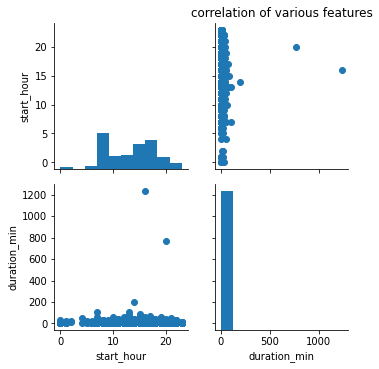

In [67]:
#lets obtain a more accurate correlation :  lets sample 1834 trips
samp = np.random.choice(df_new.shape[0], 1834, replace = False)
new_samp = df_new.loc[samp,:]

n = sb.PairGrid(data = new_samp, vars = num_fts)
n = n.map_diag(plt.hist, bins = 10);
n.map_offdiag(plt.scatter)
plt.title('correlation of various features')

As per the plots we see there aint a correlation between start_hour and duration_min.

Now lets observe trip duration in relation to the age_group

Text(0, 0.5, 'Trip duration(mins)')

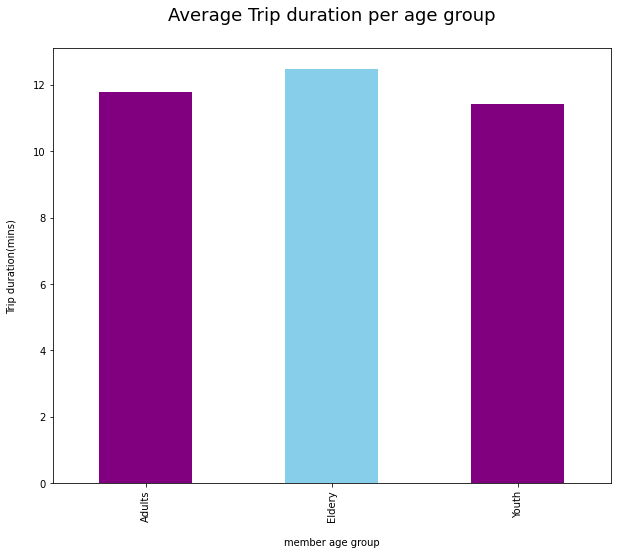

In [68]:
color = ['purple','skyblue' ]
df_new.groupby('age_group')['duration_min'].mean().plot(kind = 'bar',color=color, figsize=(10,8))
plt.title('Average Trip duration per age group', fontsize = 18, y= 1.050)
plt.xlabel('member age group', labelpad = 16)
plt.ylabel('Trip duration(mins)',labelpad = 16)

lets make it more accurat by using the member_age_ratio

Text(0, 0.5, 'Trip duration(mins)')

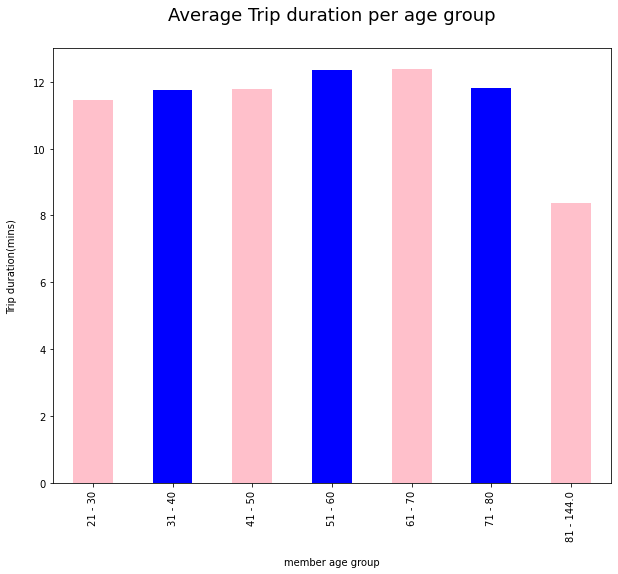

In [69]:
color = ['pink','blue' ]
df_new.groupby('member_age_ratio')['duration_min'].mean().plot(kind = 'bar',color=color, figsize=(10,8))
plt.title('Average Trip Duration Per Age Group', fontsize = 18, y= 1.050)
plt.xlabel('member age group', labelpad = 16)
plt.ylabel('Trip duration(mins)',labelpad = 16)

Even after using member age ratio we see that the ages between 21 -80 not including 80-144 as they are out the scope we see that the duration of trips is almost similar and ages 51-70 have the highest duration 

<Figure size 1440x1440 with 0 Axes>

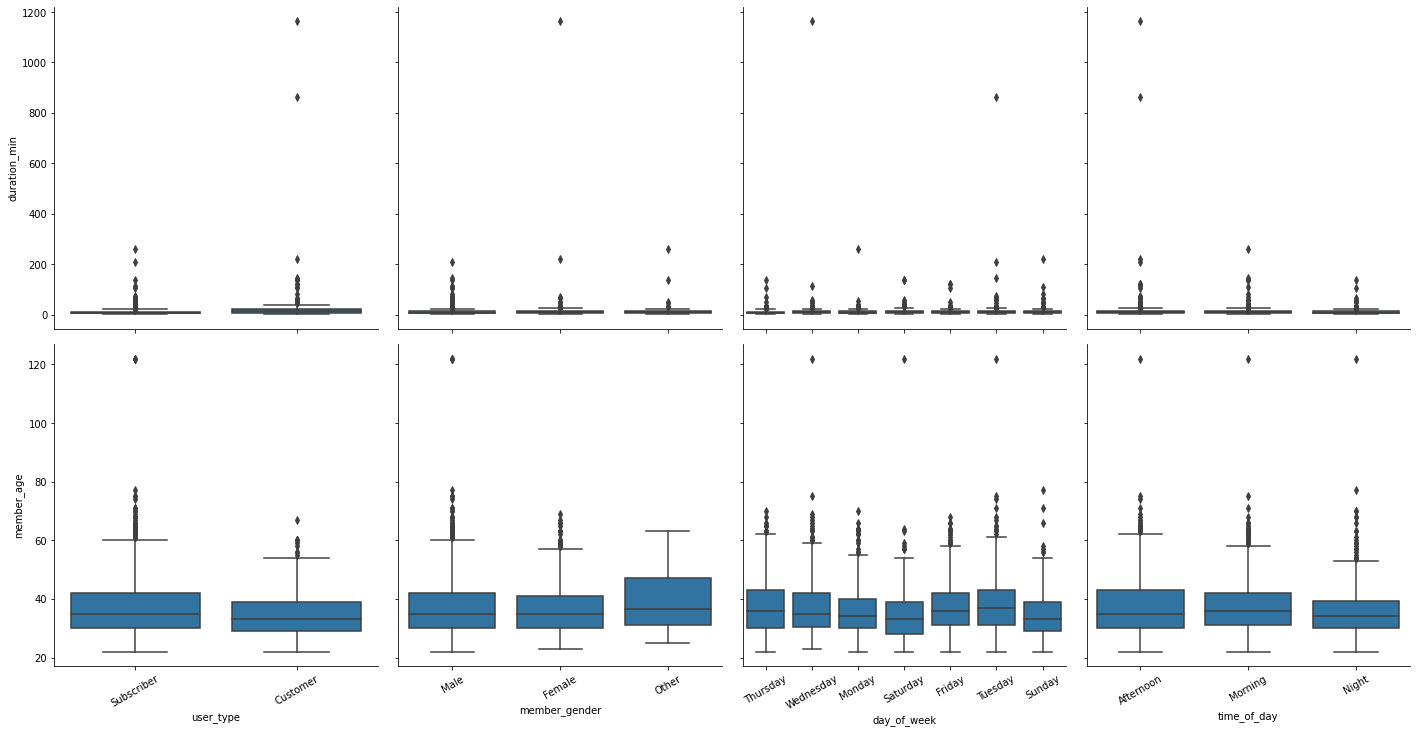

In [70]:
#lets plot a matrix between num_fts and catgs_fts
#we will use a bigger sample for this one 
samp = np.random.choice(df_new.shape[0], 2000, replace = False)
new_samp = df_new.loc[samp,:]

def bgrind(x, y, **kwargs):
    color_b = sb.color_palette()[0]
    sb.boxplot(x, y, color = color_b)
    plt.xticks(rotation = 30)
plt.figure(figsize = [20,20])
n = sb.PairGrid(data = new_samp ,y_vars = ['duration_min','member_age'], x_vars = catg_fts,
               size = 5, aspect =1.0 )
n.map(bgrind)
plt.show();

From the plot above we observe that customers seem to spend longer on trips compared to subscribers, we also observe that the male gender spend longer time on trips, while longer time on trips occur on sunday and friday, most trips happen in the morning the rest of the plot are not needed. 

Now lets continue exploring lets see the days of the week compared to use type

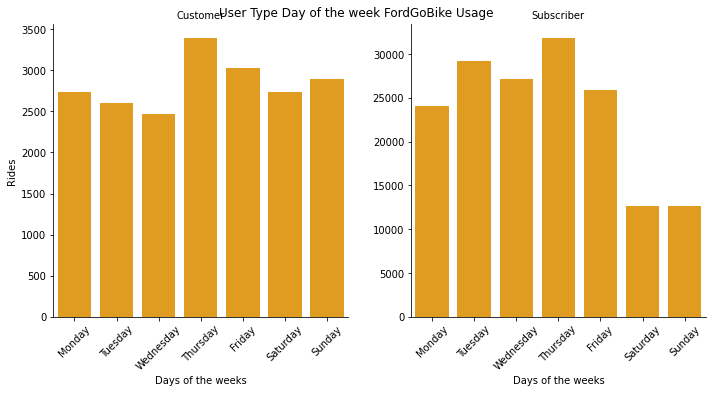

In [71]:
n = sb.catplot(data = df_new , x='day_of_week',col='user_type', kind = 'count',
              sharey = False, color ='orange',order = weekday)
n.set_axis_labels("Days of the weeks","Rides")
n.set_titles("{col_name}")
n.fig.suptitle('User Type Day of the week FordGoBike Usage')
n.set_xticklabels(rotation = 45)


As per the grapth we view that Thurday on both the customer plot and subsciber they both have most trips , we can aslo view that subscribers use the servcies mainly on the weekdays will little usage on the weekend, on the customer side we see that they mostly use the services on weekends while an average rate on weekdays(working days) from this we can conclude that subscribers use the services to commute from home to work and vice verse while customer do so druing weekends most probably for reactional activities

Now lets comapre time of the day with user type

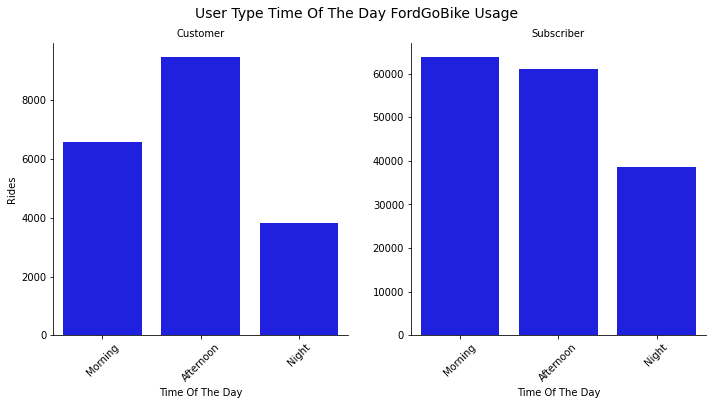

In [72]:
day_time = ['Morning','Afternoon','Night']
n = sb.catplot(data = df_new , x='time_of_day',col="user_type", kind = 'count',
              sharey = False, color ='blue',order = day_time)
n.set_axis_labels("Time Of The Day","Rides")
n.set_titles("{col_name}")
n.fig.suptitle('User Type Time Of The Day FordGoBike Usage', y = 1.03 , fontsize = 14)
n.set_xticklabels(rotation = 45)

As per we see that customers do the most trips in the afternoons ,averangely in the morning and lower trips at night while for subscribers most trips are in the morning and afterrnoon concluding that they go to work in the morning and leave in the afterrnoon most of them

Now lets compare duration with user type

,user_type,duration_min
0,Customer,23.874417
1,Subscriber,10.671061


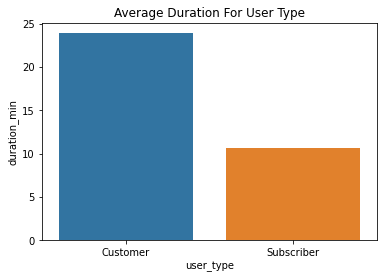

In [33]:
#lets get the trip duration mean plot
grp_user_type = df_new[['user_type','duration_min']].groupby(['user_type'],
                                                            as_index= False).mean()
display(grp_user_type)

sb.barplot(x = 'user_type', y = 'duration_min',data = grp_user_type)
plt.title('Average Duration For User Type')
plt.show()

From the above plot we can conclude that customers take  more time to carry out a trip as compared to subscirbers and from this we can assume that csutomers are most probarbly touring the city while subscribers usage is for commuting from job to work and vice verse

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> i was able to relate various features with another and made the following observations :
- Ages between 21 -80 not including 80-144 as they are out the scope we see that the duration of trips is almost similar and ages 51-70 have the highest duration
- customers seem to spend longer on trips compared to subscribers
- The male gender spend longer time on trips
- Thurday on both the customer plot and subsciber they both have most trips , we can aslo view that subscribers use the servcies mainly on the weekdays will little usage on the weekend, on the customer side we see that they mostly use the services on weekends while an average rate on weekdays(working days)
- customers do the most trips in the afternoons ,averangely in the morning and lower trips at night while for subscribers most trips are in the morning and afterrnoon
- Customers take more time to carry out a trip as compared to subscirbers 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I made an oberservation that was interesting notcied that the elderly are among the most users of the service which i dint expect especially those ranging between 71 - 80

## Multivariate Exploration


lets observe the daily average trip duration for each user type

Text(0, 0.5, 'Average Trip Duration')

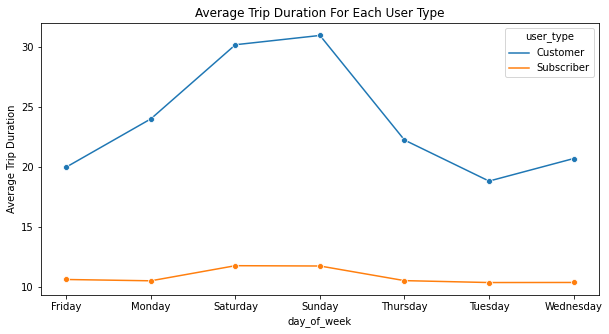

In [34]:
#lets get the mean
user_weekday_min = df_new.groupby(['user_type','day_of_week']).duration_min.mean()
user_weekday_min = user_weekday_min.reset_index()

#lets plot a line plot
plt.figure(figsize=[10,5])
sb.lineplot(data = user_weekday_min, x = 'day_of_week', y = 'duration_min', hue ='user_type',
           marker = 'o')
plt.title("Average Trip Duration For Each User Type")
plt.ylabel('Average Trip Duration')

As per the plot we conclude that customer rides took longer through out the week as comapred to the subscribers

Now lets observe average time of duration across the time of day for various user type

Text(0, 0.5, 'Average Trip Duration')

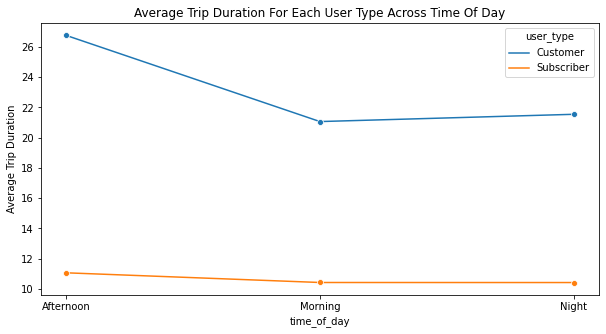

In [35]:
user_day_min = df_new.groupby(['user_type','time_of_day']).duration_min.mean()
user_day_min = user_day_min.reset_index()

#lets plot a line plot
plt.figure(figsize=[10,5])
sb.lineplot(data = user_day_min, x = 'time_of_day', y = 'duration_min', hue ='user_type',
           marker = 'o')
plt.title("Average Trip Duration For Each User Type Across Time Of Day")
plt.ylabel('Average Trip Duration')

As per the plot we see that customers trip duration is highest during the afternoon hence its incremental from morning as heads towards the afternoon while also for subscribers we see that afternoon is when as it the highest while both of them have there lowest duration at night

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> By carring out the combination of user type ,duration,day of week and time of day i made the following observation :
- Customer rides took longer through out the week as comapred to the subscribers
- Customers trip duration is highest during the afternoon hence its incremental from morning as heads towards the afternoon while also for subscribers we see that afternoon is when as it the highest while both of them have there lowest duration at night

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No interesting obervation made as all i needed to know was satisfied

## Conclusions
>The data was a bit easy to work with as i only carried out little changes adding column by combing certain variables , changing datatypes of some variables hence this few changes made it easy to work with the data.

> The main obervation made are all at the end of every exploration(Univariate, Bivariate , Multivariate)


## Resources
1. https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot
2. https://matplotlib.org/
3. https://stackoverflow.com/questions/12725417/drop-non-numeric-columns-from-a-pandas-dataframe


In [75]:
#lets save the dataset that we have analayzed
df_new.to_csv('fordgobike.csv',index= False)